In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)
tf.executing_eagerly()

True

In [51]:
x = tf.Variable(tf.constant([[1, 2], [3, 4]]))
x.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [52]:
y = tf.Variable('sholla')
y

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'sholla'>

In [53]:
x = tf.Variable(3, dtype=tf.float16)
with tf.GradientTape() as tape:
    y = tf.math.square(x)
    
dydx = tape.gradient(y, x)
print(dydx.numpy())

6.0


In [54]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1.0, 2.0, 3.0]]

with tf.GradientTape() as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)
    
[dldw, dldb] = tape.gradient(loss, [w, b])
print(dldw.numpy())
print()
print(dldb.numpy())

[[1.9242841 0.1776021]
 [3.8485682 0.3552042]
 [5.7728524 0.5328063]]

[1.9242841 0.1776021]


In [55]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1.0, 2.0, 3.0]])

with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables) 
for v, g in zip(layer.trainable_variables, grad):
    print(f'{v.name}, shape: {g.shape}')

dense_7/kernel:0, shape: (3, 2)
dense_7/bias:0, shape: (2,)


In [56]:
print([var.name for var in tape.watched_variables()])

['dense_7/kernel:0', 'dense_7/bias:0']


In [57]:
x = tf.linspace(-10.0, 10.0, 200+1)
print(x.numpy())

[-10.          -9.9         -9.8         -9.7         -9.6
  -9.5         -9.4         -9.3         -9.2         -9.1
  -9.          -8.9         -8.8         -8.7         -8.6
  -8.5         -8.4         -8.3         -8.2         -8.1
  -8.          -7.8999996   -7.8         -7.7         -7.6
  -7.5         -7.3999996   -7.3         -7.2         -7.1
  -7.          -6.8999996   -6.8         -6.7         -6.6
  -6.5         -6.3999996   -6.3         -6.2         -6.1
  -6.          -5.9         -5.7999997   -5.7         -5.6
  -5.5         -5.4         -5.2999997   -5.2         -5.1
  -5.          -4.9         -4.7999997   -4.7         -4.6
  -4.5         -4.4         -4.2999997   -4.2         -4.1
  -4.          -3.9         -3.7999997   -3.6999998   -3.6
  -3.5         -3.4         -3.2999997   -3.1999998   -3.1
  -3.          -2.9         -2.7999997   -2.6999998   -2.6
  -2.5         -2.4         -2.2999997   -2.1999998   -2.1
  -2.          -1.8999996   -1.8000002   -1.6999998   -1

In [58]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.sigmoid(x)

dydx = tape.gradient(y, x)

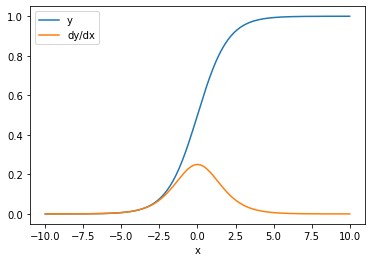

In [60]:
plt.plot(x, y, label='y')
plt.plot(x, dydx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')